In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
df = pd.read_csv('Titanic-Dataset.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [23]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,455.495050,0.663366,1.198020,35.112392,0.445545,0.440594,76.103301
std,249.704228,0.473732,0.528205,14.988475,0.630490,0.732294,74.759941
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.250000,0.000000,1.000000,25.000000,0.000000,0.000000,28.959375
50%,457.500000,1.000000,1.000000,33.500000,0.000000,0.000000,55.000000
75%,681.500000,1.000000,1.000000,46.750000,1.000000,1.000000,89.776050
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [ ]:
# data cleaning 

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.dropna(subset=['Cabin', 'Embarked'], inplace=True)

In [17]:
missing_values = df.isnull().sum()
missing_values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

C:\Users\saiya\AppData\Local\Temp\ipykernel_10624\2134654662.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[selected_cols].corr()


<Figure size 1000x800 with 0 Axes>

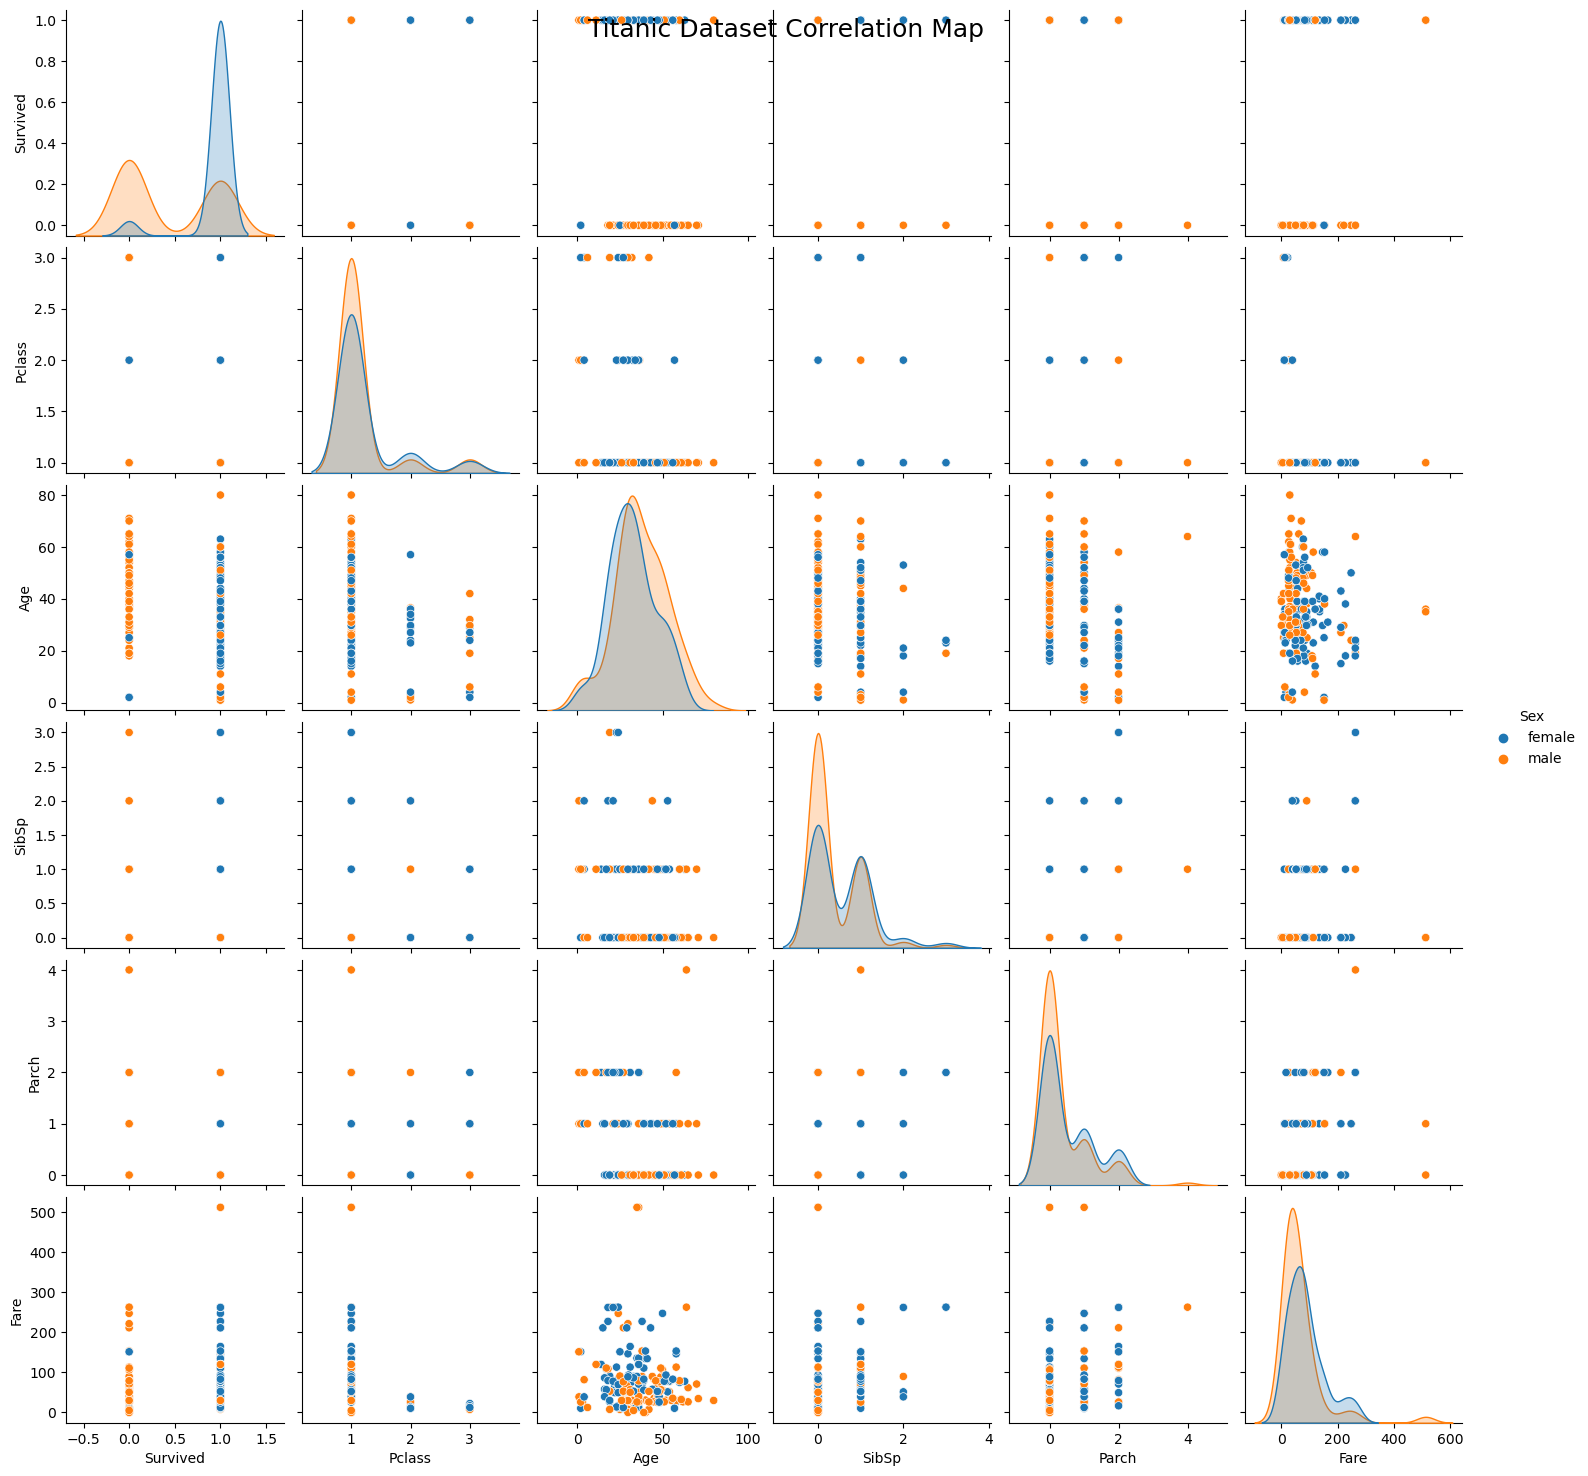

In [31]:
# corelation of the dataset 

# Select a subset of columns (numerical and categorical)
selected_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']


corr_matrix = df[selected_cols].corr()


plt.figure(figsize=(10, 8))
sns.pairplot(df[selected_cols], diag_kind='kde', markers='o', hue='Sex')


plt.suptitle('Titanic Dataset Correlation Map', fontsize=18)
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

In [ ]:
# converting the categorical variables into numerical 

In [49]:
# Preprocess the data
x = df.iloc[:,2:8].values
y = df.iloc[:,1].values

In [51]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
le_x = LabelEncoder()
x[:,4] = le_x.fit_transform(x[:,4])

In [53]:
x = x[:,4:]
x

array([[1, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [3, 2],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [3, 2],
       [1, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 2],
       [1, 0],
       [0, 0],
       [0, 2],
       [1, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [2, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [2, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 2],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 2],
       [1, 0],
       [0, 0],
       [0,

In [ ]:
# Model building 
# we are using Logistic regression 

In [57]:
# spliting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.03, random_state = 20)


In [81]:
# Create dataframes for training and testing data
strat_train_data = pd.DataFrame(y_train, columns=['Survived'])
strat_test_data = pd.DataFrame(y_test, columns=['Survived'])


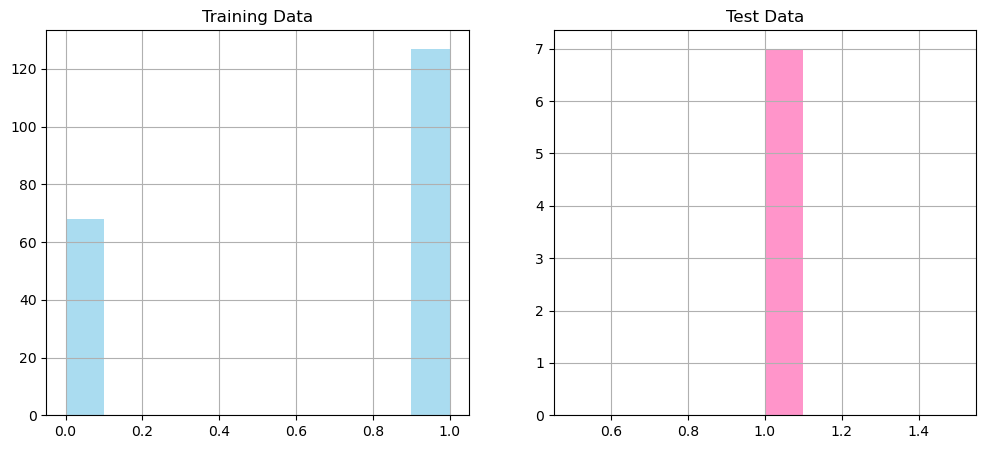

In [85]:
# Visualize the training and testing data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
strat_train_data["Survived"].hist(color='skyblue', alpha=0.7)
plt.title("Training Data")

plt.subplot(1, 2, 2)
strat_test_data["Survived"].hist(color='hotpink', alpha=0.7)
plt.title("Test Data")

plt.show()


In [63]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)


In [65]:
logreg

LogisticRegression()

In [67]:
logreg.score(x_test, y_test)*100

100.0

In [69]:
# Evaluate the model
from sklearn import metrics
expected = y_test
predicted = logreg.predict(x_test)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

[[7]]


In [71]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)*100
accuracy 

100.0

In [89]:
# Make predictions on the entire dataset
predictions = logreg.predict(x)

In [91]:
# Create a submission dataframe
the_final_df = pd.DataFrame(df["PassengerId"])
the_final_df["Survived"] = predictions

In [97]:

print(the_final_df) 

     PassengerId  Survived
1              2         1
3              4         1
6              7         1
10            11         1
11            12         1
..           ...       ...
871          872         1
872          873         1
879          880         1
887          888         1
889          890         1

[202 rows x 2 columns]


In [ ]:
# using Random Forest Classifier 

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier



In [101]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.03, random_state=20)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=20)
rf.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(x_test)

In [105]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

Confusion Matrix:
[[7]]
F1 Score: 1.0


In [109]:
# Make predictions on the entire dataset
predictions = rf.predict(x)
the_final_df = pd.DataFrame(df["PassengerId"])
the_final_df["Survived"] = predictions



In [113]:
# Print the final predictions
print("Final Predictions:")
print(the_final_df)

Final Predictions:
     PassengerId  Survived
1              2         1
3              4         1
6              7         1
10            11         1
11            12         1
..           ...       ...
871          872         1
872          873         1
879          880         1
887          888         1
889          890         1

[202 rows x 2 columns]
